# Exploração Inicial e Agrupamento Completo

Neste notebook, foi realizada a exploração dos dados e o primeiro experimento de agrupamento utilizando todas as 35 variáveis disponíveis. A análise envolveu testar diferentes valores de *k* para determinar o número ideal de clusters. Inicialmente, testamos valores de *k* variando de 20 a 1500, com passos de 100, e de 2 a 20, com passos de 2. O agrupamento foi realizado utilizando quatro algoritmos: KMeans, GMM, Hierárquico e DBSCAN.

O algoritmo KMeans obteve o melhor resultado, com um *silhouette score* de 0.05 quando o valor de *k* foi definido como 8. Outros algoritmos, como GMM, Hierárquico e DBSCAN, apresentaram resultados inferiores, com o DBSCAN não conseguindo formar clusters úteis. A análise inicial sugeriu que o uso de todas as variáveis gerou ruído e dificultou a formação de agrupamentos bem definidos.


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Carregando os dados

In [47]:
df1 = pd.read_csv ('~/Documents/banking-customer-clustering/bank_data.csv')
df1.head()

,Branch_ID,City,Region,Firm_Revenue,Expenses,Profit_Margin
0,1000,Solapur,East,422443.0,346471,56.31
1,1001,Mumbai,North,211155.0,216256,79.53
2,1002,Nashik,West,985006.0,71777,55.31
3,1003,Solapur,North,55113.0,253655,2.57
4,1004,Nagpur,West,282701.0,148194,-14.10


In [48]:
df2 = pd.read_csv ('~/Documents/banking-customer-clustering/customer_data.csv')
df2.head()

,Customer_ID,Age,Customer_Type,City,Region,Bank_Name,Branch_ID
0,200000,56.0,Employee,Pune,North,HDFC Bank,1350
1,200001,69.0,NaN,Kolhapur,East,HDFC Bank,1648
2,200002,46.0,Business,Pune,West,HDFC Bank,1798
3,200003,32.0,Individual,Pune,West,HDFC Bank,1900
4,200004,NaN,Business,Kolhapur,East,HDFC Bank,1227


In [49]:
df3 = pd.read_csv ('~/Documents/banking-customer-clustering/transaction_data.csv')
df3.head()

,Transaction_ID,Customer_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date
0,300000,209689,Business,69339,4794.0,42580,Fixed Deposit,2024-12-08
1,300001,206124,Business,12825,3500.0,46605,Fixed Deposit,2022-09-09
2,300002,207501,Current,67753,2401.0,17027,Fixed Deposit,2022-04-28
3,300003,208675,Savings,67061,2952.0,3054,Fixed Deposit,2023-05-22
4,300004,204923,Business,8566,1025.0,44937,Fixed Deposit,2023-04-05


In [50]:
bank_data = pd.merge(df1, df2, on= 'Branch_ID', how='inner')

In [51]:
df = pd.merge(bank_data, df3, on='Customer_ID', how='inner')

In [52]:
df.head()

,Branch_ID,City_x,Region_x,Firm_Revenue,Expenses,Profit_Margin,Customer_ID,Age,Customer_Type,City_y,Region_y,Bank_Name,Transaction_ID,Account_Type,Total_Balance,Transaction_Amount,Investment_Amount,Investment_Type,Transaction_Date
0,1000,Solapur,East,422443.0,346471,56.31,204700,54.0,Individual,Kolhapur,East,HDFC Bank,304833,Current,57622,4676.0,11260,Fixed Deposit,2024-04-05
1,1000,Solapur,East,422443.0,346471,56.31,204955,51.0,Business,Solapur,South,HDFC Bank,300574,Business,37337,1121.0,27750,Fixed Deposit,2024-05-29
2,1000,Solapur,East,422443.0,346471,56.31,205772,57.0,Individual,Nashik,West,HDFC Bank,304051,Current,26773,2924.0,9480,Recurring Deposit,2025-02-14
3,1000,Solapur,East,422443.0,346471,56.31,205772,57.0,Individual,Nashik,West,HDFC Bank,307451,Current,31080,780.0,8956,Fixed Deposit,2022-11-07
4,1000,Solapur,East,422443.0,346471,56.31,205772,57.0,Individual,Nashik,West,HDFC Bank,309364,Business,61386,3988.0,19907,Mutual Fund,2023-05-03


# Análise exploratória

In [53]:
df.shape

(10000, 19)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Branch_ID           10000 non-null  int64  
 1   City_x              10000 non-null  object 
 2   Region_x            10000 non-null  object 
 3   Firm_Revenue        9433 non-null   float64
 4   Expenses            10000 non-null  int64  
 5   Profit_Margin       10000 non-null  float64
 6   Customer_ID         10000 non-null  int64  
 7   Age                 9499 non-null   float64
 8   Customer_Type       9495 non-null   object 
 9   City_y              9496 non-null   object 
 10  Region_y            10000 non-null  object 
 11  Bank_Name           10000 non-null  object 
 12  Transaction_ID      10000 non-null  int64  
 13  Account_Type        10000 non-null  object 
 14  Total_Balance       10000 non-null  int64  
 15  Transaction_Amount  10000 non-null  float64
 16  Inves

In [55]:
df.describe()

,Branch_ID,Firm_Revenue,Expenses,Profit_Margin,Customer_ID,Age,Transaction_ID,Total_Balance,Transaction_Amount,Investment_Amount
count,10000.000000,9433.000000,10000.000000,10000.000000,10000.000000,9499.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1496.861600,507974.155412,266679.728400,24.036064,205028.182600,49.086535,304999.50000,50221.505800,2542.708056,25550.248400
std,290.492938,277581.933403,139731.304605,42.370806,2909.008139,18.104528,2886.89568,28540.392011,1432.677420,14108.052078
min,1000.000000,51241.000000,20520.000000,-49.500000,200000.000000,18.000000,300000.00000,1003.000000,51.613952,1001.000000
25%,1241.000000,255785.000000,148194.000000,-12.800000,202498.750000,34.000000,302499.75000,25132.000000,1310.000000,13381.000000
50%,1498.000000,510682.000000,269692.000000,22.360000,205060.000000,49.000000,304999.50000,50326.000000,2538.500000,25708.500000
75%,1748.000000,740370.000000,394440.000000,61.340000,207561.000000,65.000000,307499.25000,74914.500000,3746.250000,37731.000000
max,1999.000000,999975.000000,499568.000000,99.970000,209999.000000,79.000000,309999.00000,99993.000000,7046.296441,49998.000000


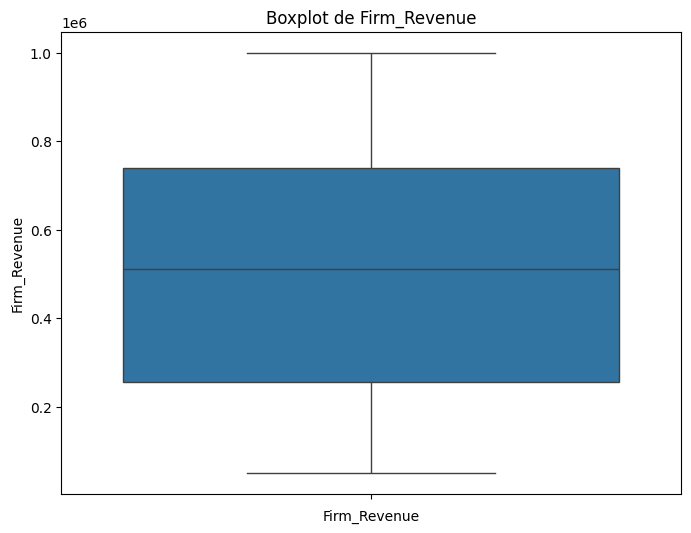

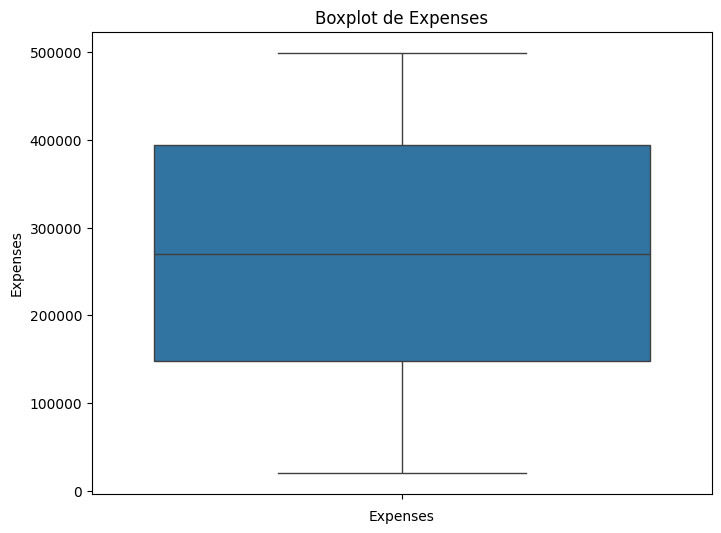

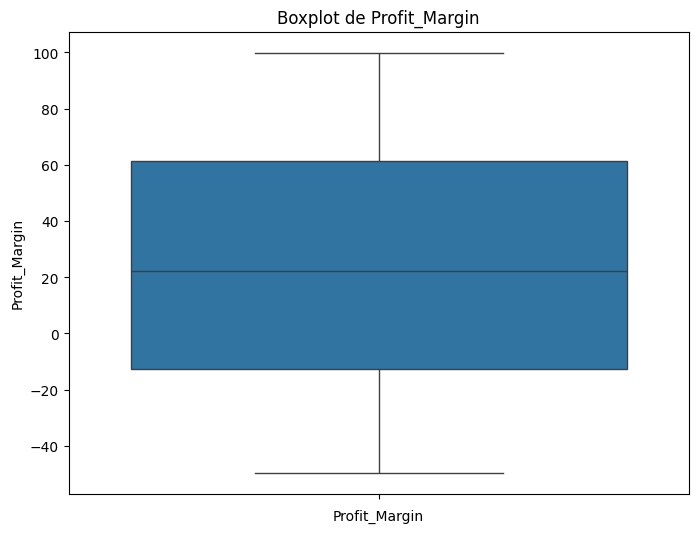

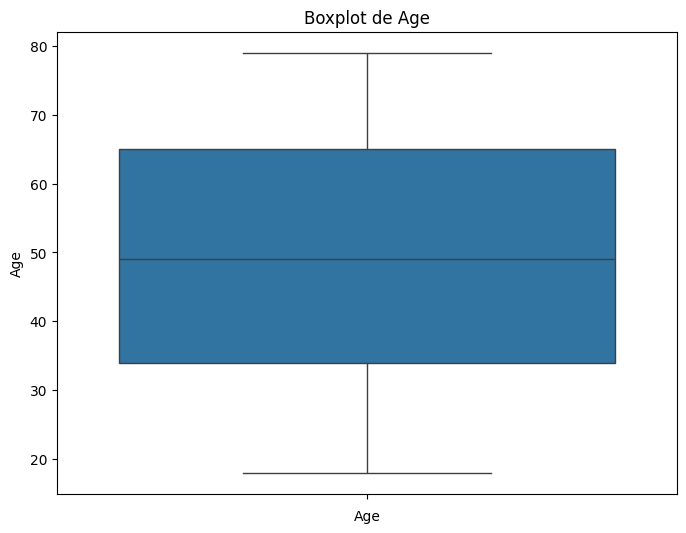

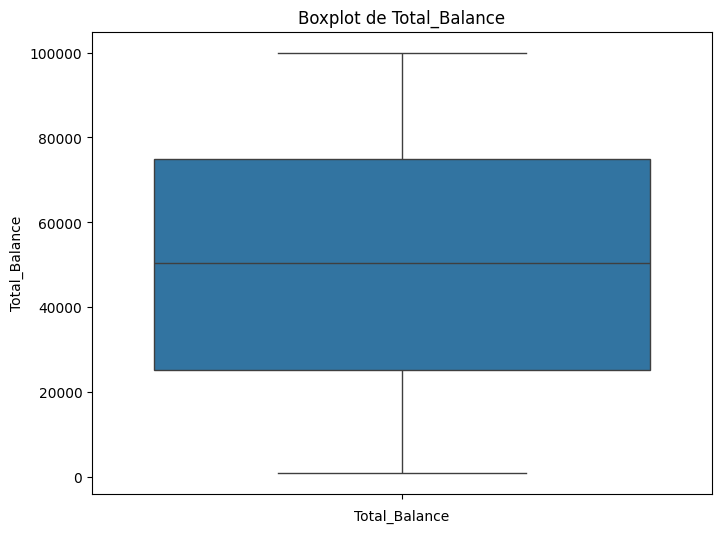

In [56]:
# Listando as colunas numéricas para gerar os boxplots
numerical_columns = ['Firm_Revenue', 'Expenses', 'Profit_Margin', 'Age', 'Total_Balance']

# Gerando boxplots para cada variável
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()


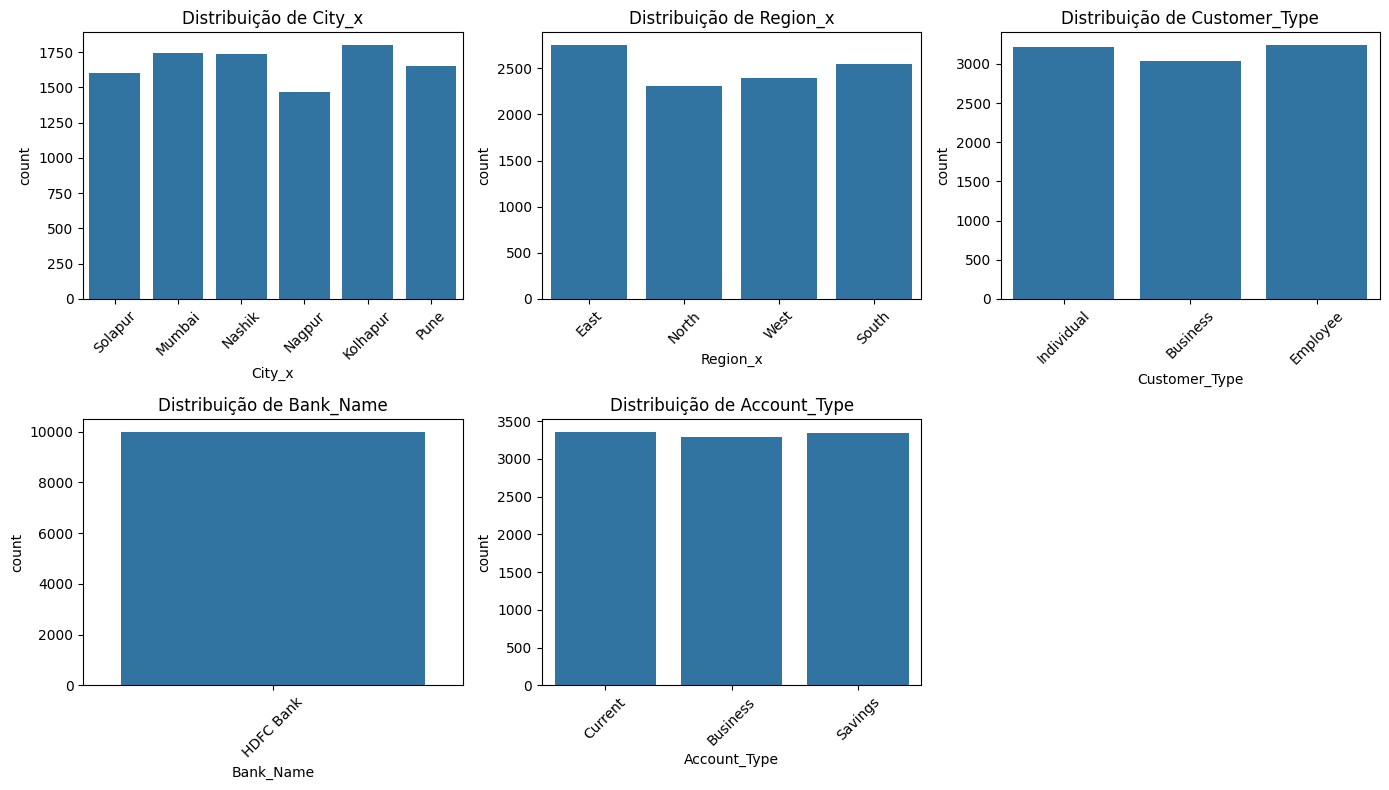

In [57]:
# Gráfico de barras para variáveis categóricas
categorical_columns = ['City_x', 'Region_x', 'Customer_Type', 'Bank_Name', 'Account_Type']

plt.figure(figsize=(14, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribuição de {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


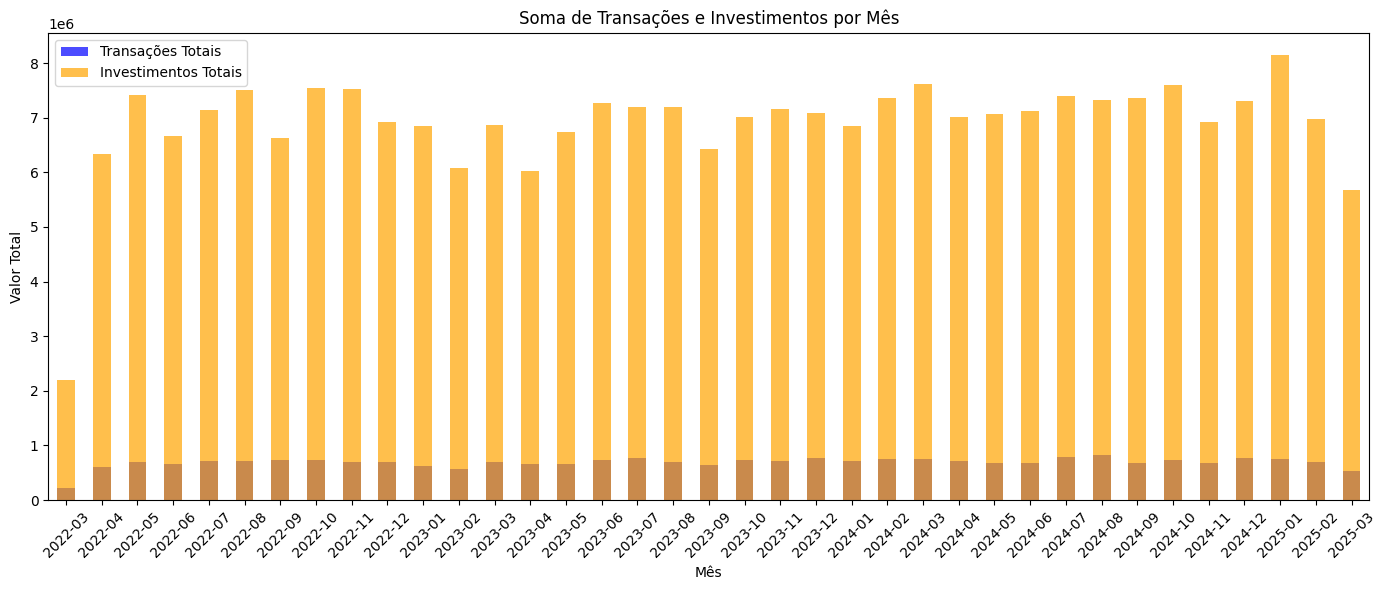

In [59]:
# Adicionando uma coluna 'Ano-Mês'
df['Month'] = pd.to_datetime(df['Transaction_Date']).dt.to_period('M')

# Agrupando por 'Month' e somando os valores de transações e investimentos
df_monthly = df.groupby('Month')[['Transaction_Amount', 'Investment_Amount']].sum()

# Plotando a soma das transações por mês
plt.figure(figsize=(14, 6))
df_monthly['Transaction_Amount'].plot(kind='bar', color='blue', alpha=0.7, label='Transações Totais')
df_monthly['Investment_Amount'].plot(kind='bar', color='orange', alpha=0.7, label='Investimentos Totais')

plt.title('Soma de Transações e Investimentos por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


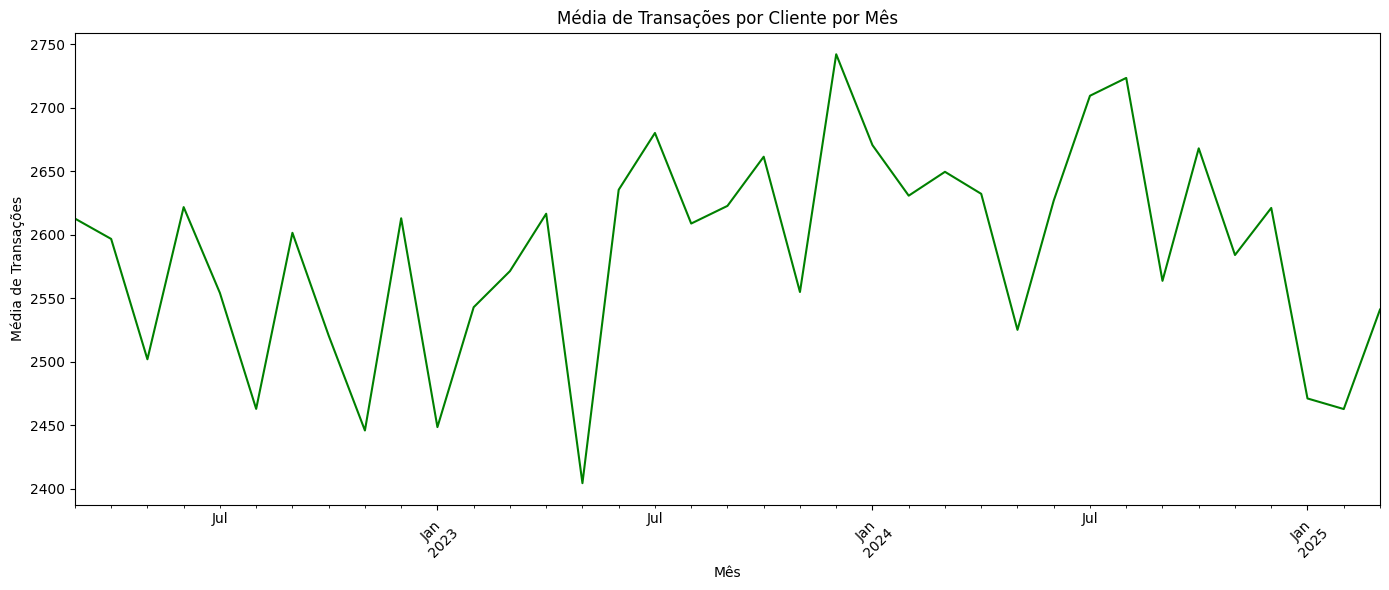

In [60]:
# Agrupando por 'Month' e 'Customer_ID' para obter a média de transações
df_customer_monthly = df.groupby(['Month', 'Customer_ID'])['Transaction_Amount'].sum().reset_index()

# Calculando a média das transações por mês
df_monthly_avg = df_customer_monthly.groupby('Month')['Transaction_Amount'].mean()

# Plotando a média de transações por cliente por mês
plt.figure(figsize=(14, 6))
df_monthly_avg.plot(kind='line', color='green')
plt.title('Média de Transações por Cliente por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Transações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Dataprep

In [61]:
# Imputação dados numéricos (média)
imputer = SimpleImputer(strategy='mean')  
df['Firm_Revenue'] = imputer.fit_transform(df[['Firm_Revenue']])
df['Age'] = imputer.fit_transform(df[['Age']])

In [62]:
df.shape

(10000, 20)

In [63]:
# Imputação dados numéricos (moda)
# Lista das colunas categóricas
cat_cols = ['Customer_Type', 'City_y', 'Investment_Type', 'City_x', 'Region_x', 'Bank_Name', 'Account_Type']

# Imputador com a moda
imputer = SimpleImputer(strategy='most_frequent')

# Aplicando a imputação coluna a coluna
for col in cat_cols:
    df[col] = imputer.fit_transform(df[[col]])[:, 0]



In [64]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

In [65]:
df['transaction_dayofweek'] = df['Transaction_Date'].dt.dayofweek
df['transaction_day'] = df['Transaction_Date'].dt.day
df['is_weekend'] = df['transaction_dayofweek'].isin([5, 6]).astype(int)
df['days_since_first_tx'] = (df['Transaction_Date'] - df['Transaction_Date'].min()).dt.days

In [66]:
# Codificar variáveis categóricas:
df_encoded = pd.get_dummies(df, columns=['Customer_Type', 'Account_Type', 'Investment_Type', 'City_x', 'Region_x', 'City_y', 'Region_y', 'Bank_Name' ], drop_first=True)

In [67]:
df_encoded = df_encoded.drop(columns=['Transaction_Date', 'Month'])

In [68]:
df_encoded.corr()

,Branch_ID,Firm_Revenue,Expenses,Profit_Margin,Customer_ID,Age,Transaction_ID,Total_Balance,Transaction_Amount,Investment_Amount,...,Region_x_South,Region_x_West,City_y_Mumbai,City_y_Nagpur,City_y_Nashik,City_y_Pune,City_y_Solapur,Region_y_North,Region_y_South,Region_y_West
Branch_ID,1.000000,-0.055054,0.048853,-0.004738,-0.007143,0.011503,-0.011005,0.001147,0.001778,-0.007047,...,0.023975,-0.038427,0.016556,0.024677,-0.017674,-0.027327,0.003232,0.007509,0.030257,-0.003056
Firm_Revenue,-0.055054,1.000000,-0.010061,0.059009,0.002300,0.005740,-0.007421,0.005625,0.003084,0.000062,...,0.036289,-0.036979,0.009576,0.025031,-0.027515,0.010501,-0.002588,-0.012449,0.006474,-0.003947
Expenses,0.048853,-0.010061,1.000000,0.015453,-0.022014,-0.006827,0.014589,-0.004495,-0.018364,-0.013891,...,0.003608,0.017586,-0.010228,0.014578,-0.012738,-0.008481,0.005306,-0.005283,0.004830,0.025028
Profit_Margin,-0.004738,0.059009,0.015453,1.000000,-0.000582,-0.009449,0.006605,-0.006513,-0.001473,0.009610,...,-0.003128,-0.031476,0.003015,-0.024143,-0.018149,0.023910,0.021365,-0.015597,-0.002065,0.006838
Customer_ID,-0.007143,0.002300,-0.022014,-0.000582,1.000000,-0.029854,0.001694,0.001245,-0.012496,0.007713,...,0.001466,0.014213,0.001404,0.002916,0.020530,-0.004209,0.001176,-0.009634,-0.011920,0.012425
Age,0.011503,0.005740,-0.006827,-0.009449,-0.029854,1.000000,-0.002062,0.011463,-0.008260,-0.003751,...,-0.013018,-0.005975,-0.005162,-0.005062,-0.025288,-0.005705,0.026754,0.019337,-0.029854,0.005900
Transaction_ID,-0.011005,-0.007421,0.014589,0.006605,0.001694,-0.002062,1.000000,0.000229,0.008713,0.000030,...,-0.001724,0.002208,-0.000002,0.006761,0.001223,-0.014418,0.007510,-0.016322,-0.001642,0.008040
Total_Balance,0.001147,0.005625,-0.004495,-0.006513,0.001245,0.011463,0.000229,1.000000,0.001355,0.008832,...,-0.002669,-0.000613,-0.001097,-0.006400,0.018401,-0.006719,0.006860,0.009694,-0.002615,0.001066
Transaction_Amount,0.001778,0.003084,-0.018364,-0.001473,-0.012496,-0.008260,0.008713,0.001355,1.000000,0.010953,...,-0.004051,-0.006805,-0.021456,-0.000609,0.001343,0.005747,0.021188,-0.000423,0.000189,-0.005249
Investment_Amount,-0.007047,0.000062,-0.013891,0.009610,0.007713,-0.003751,0.000030,0.008832,0.010953,1.000000,...,0.026955,-0.023848,-0.001900,0.004584,0.002827,-0.005841,-0.017918,0.010398,0.019725,-0.018700


In [69]:
# Padronizar os dados numéricos:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop('Customer_ID', axis=1))

In [70]:
X_scaled.shape

(10000, 35)

# Agrupamento kmeans

In [71]:
inertias = []
silhouette_scores = []
k_range = range(20, 1500, 100)

In [72]:

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Armazena a inércia
    inertias.append(kmeans.inertia_)
    
    # Armazena o silhouette score
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

KeyboardInterrupt: 

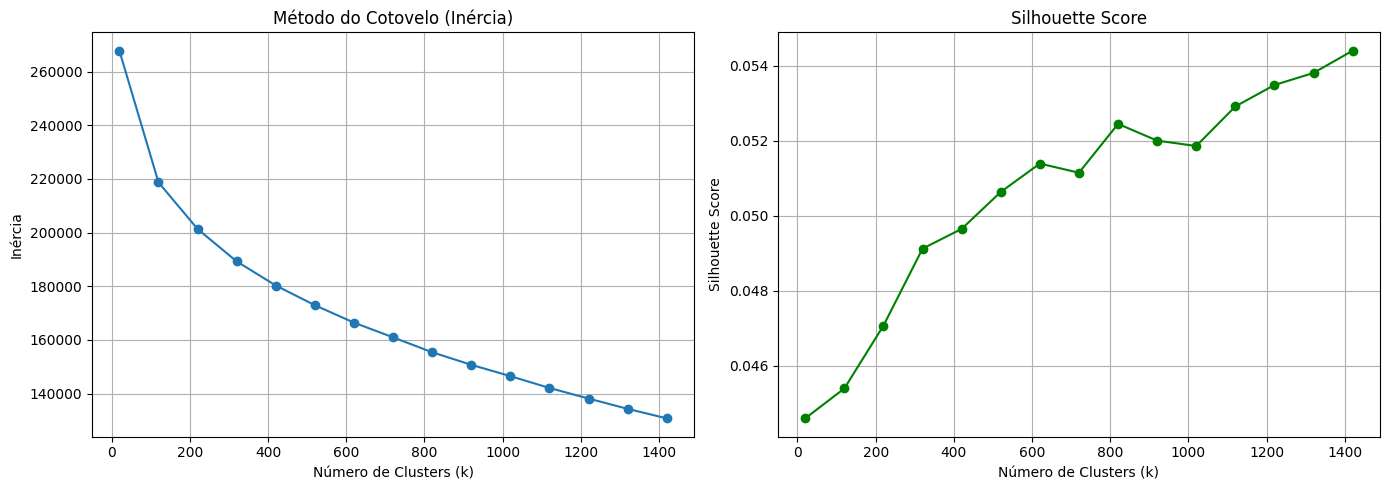

In [ ]:
import matplotlib.pyplot as plt

# Criando os subplots primeiro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico do Cotovelo
ax1.plot(k_range, inertias, marker='o')
ax1.set_title('Método do Cotovelo (Inércia)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inércia')
ax1.grid(True)

# Gráfico do Silhouette
ax2.plot(k_range, silhouette_scores, marker='o', color='green')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()


In [ ]:
inertias = []
silhouette_scores = []
k_range = range(2, 20, 2)

In [ ]:

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Armazena a inércia
    inertias.append(kmeans.inertia_)
    
    # Armazena o silhouette score
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

KeyboardInterrupt: 

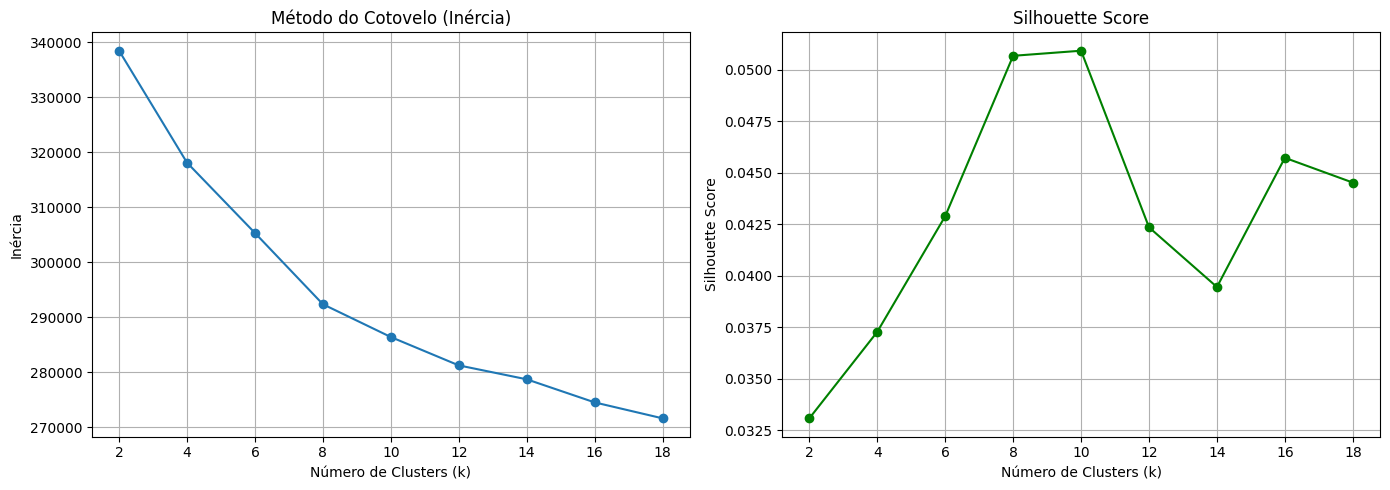

In [ ]:
import matplotlib.pyplot as plt

# Criando os subplots primeiro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico do Cotovelo
ax1.plot(k_range, inertias, marker='o')
ax1.set_title('Método do Cotovelo (Inércia)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inércia')
ax1.grid(True)

# Gráfico do Silhouette
ax2.plot(k_range, silhouette_scores, marker='o', color='green')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
#plt.show()


# Outros algoritmos - clusterização

In [ ]:
#DBSCAN

dbscan = DBSCAN(eps=100, min_samples=5000)  # você pode ajustar esses parâmetros
db_labels = dbscan.fit_predict(X_scaled)

# Verificando se o silhouette faz sentido
if len(set(db_labels)) > 1 and -1 not in set(db_labels):
    sil_db = silhouette_score(X_scaled, db_labels)
    print("Silhouette Score - DBSCAN:", sil_db)
else:
    print("DBSCAN não formou clusters utilizáveis ou gerou muitos outliers.")


DBSCAN não formou clusters utilizáveis ou gerou muitos outliers.


In [ ]:
# Agrupamento Hierarquico

agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(X_scaled)
sil_agg = silhouette_score(X_scaled, agg_labels)
print("Silhouette Score - Hierárquico:", sil_agg)

Silhouette Score - Hierárquico: 0.03862607655442032


In [ ]:
# GMM

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
sil_gmm = silhouette_score(X_scaled, gmm_labels)
print("Silhouette Score - GMM:", sil_gmm)


Silhouette Score - GMM: 0.03728556244701199


In [ ]:
# Avaliação

results = {
    "Algoritmo": ["KMeans", "Hierárquico", "DBSCAN", "GMM"],
    "Silhouette Score": [0.52, sil_agg, np.nan if len(set(db_labels)) <= 1 else silhouette_score(X_scaled, db_labels), sil_gmm]
}
pd.DataFrame(results)


,Algoritmo,Silhouette Score
0,KMeans,0.520000
1,Hierárquico,0.038626
2,DBSCAN,NaN
3,GMM,0.037286


# Teste com redução de dimensionalidade

In [73]:
top_variance_features = df_encoded.var().sort_values(ascending=False).head(20)


In [74]:
top_variance_features

Firm_Revenue                         7.268246e+10
Expenses                             1.952484e+10
Total_Balance                        8.145540e+08
Investment_Amount                    1.990371e+08
Customer_ID                          8.462328e+06
Transaction_ID                       8.334167e+06
Transaction_Amount                   2.052565e+06
days_since_first_tx                  1.009686e+05
Branch_ID                            8.438615e+04
Profit_Margin                        1.795285e+03
Age                                  3.113508e+02
transaction_day                      7.852440e+01
transaction_dayofweek                4.008160e+00
Customer_Type_Employee               2.343233e-01
Account_Type_Current                 2.232246e-01
Account_Type_Savings                 2.226651e-01
Investment_Type_Recurring Deposit    2.223998e-01
Investment_Type_Mutual Fund          2.220329e-01
Customer_Type_Individual             2.180166e-01
is_weekend                           2.021030e-01


In [77]:
cols_to_avg = [
    'Firm_Revenue', 'Expenses', 'Total_Balance', 'Investment_Amount',
    'Transaction_Amount', 'Profit_Margin', 'Age',
    'days_since_first_tx', 'transaction_day', 'transaction_dayofweek',
    'is_weekend', 'Customer_Type_Employee', 'Customer_Type_Individual',
    'Account_Type_Current', 'Account_Type_Savings',
    'Investment_Type_Recurring Deposit', 'Investment_Type_Mutual Fund'
]

# Média por cliente
df_summary = df_encoded.groupby('Customer_ID')[cols_to_avg].mean().reset_index()
df_summary.shape

(6335, 18)

In [78]:
# Padronizar os dados numéricos:
scaler = StandardScaler()
X_scaled_sum = scaler.fit_transform(df_summary.drop('Customer_ID', axis=1))

In [79]:
inertias = []
silhouette_scores = []
k_range = range(2, 20, 2)

In [80]:

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled_sum)
    
    # Armazena a inércia
    inertias.append(kmeans.inertia_)
    
    # Armazena o silhouette score
    silhouette_scores.append(silhouette_score(X_scaled_sum, cluster_labels))

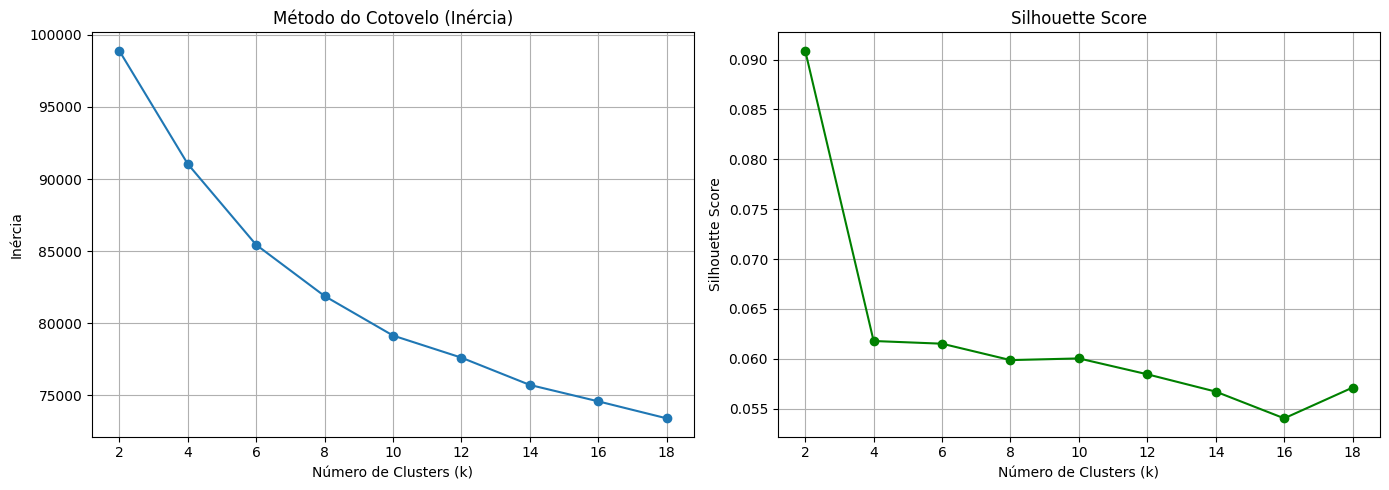

In [81]:
import matplotlib.pyplot as plt

# Criando os subplots primeiro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico do Cotovelo
ax1.plot(k_range, inertias, marker='o')
ax1.set_title('Método do Cotovelo (Inércia)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inércia')
ax1.grid(True)

# Gráfico do Silhouette
ax2.plot(k_range, silhouette_scores, marker='o', color='green')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()


In [88]:
top5_variance_features = df_encoded.var().sort_values(ascending=False).head(5)


In [89]:
top5_variance_features

Firm_Revenue         7.268246e+10
Expenses             1.952484e+10
Total_Balance        8.145540e+08
Investment_Amount    1.990371e+08
Customer_ID          8.462328e+06
dtype: float64

In [91]:
cols_to_avg = [
    'Firm_Revenue', 'Expenses', 'Total_Balance', 'Investment_Amount',
    'Transaction_Amount'
]

# Média por cliente
df_summary_5 = df_encoded.groupby('Customer_ID')[cols_to_avg].mean().reset_index()
df_summary_5.shape

(6335, 6)

In [92]:
# Padronizar os dados numéricos:
scaler = StandardScaler()
X_scaled_sum_5 = scaler.fit_transform(df_summary_5.drop('Customer_ID', axis=1))

In [93]:
inertias = []
silhouette_scores = []
k_range = range(2, 20, 2)

In [94]:

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled_sum_5)
    
    # Armazena a inércia
    inertias.append(kmeans.inertia_)
    
    # Armazena o silhouette score
    silhouette_scores.append(silhouette_score(X_scaled_sum_5, cluster_labels))

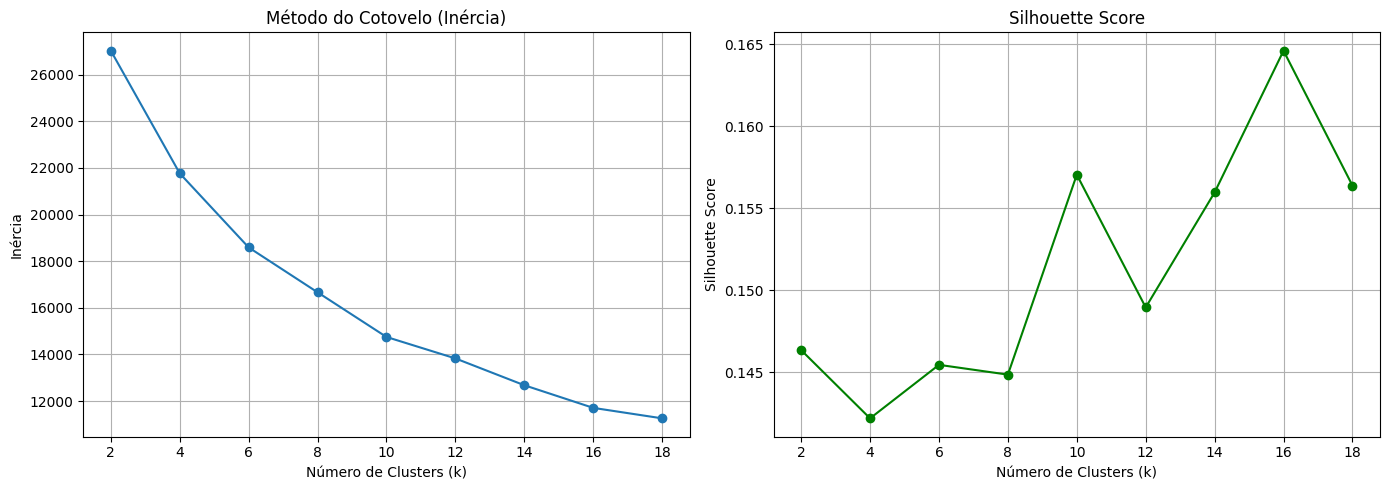

In [95]:
import matplotlib.pyplot as plt

# Criando os subplots primeiro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico do Cotovelo
ax1.plot(k_range, inertias, marker='o')
ax1.set_title('Método do Cotovelo (Inércia)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inércia')
ax1.grid(True)

# Gráfico do Silhouette
ax2.plot(k_range, silhouette_scores, marker='o', color='green')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()
